<div style='width=100%'><img  src=https://universidadeuropea.com/resources/media/images/universidad-europea-logo_poc9mEM.original.png width=200></div>

<ul style='font-family: "Times New Roman", Times, serif;'>ESTUDIANTES
    <li>Adilem Dobras</li><li>Alvaro Martinez</li></ul>

<ol>Informacion destacable del trabajo:
<li>Las V de la tabla son verificaciones</li>
<li>Los h son la cuenta de los registros en las 24 horas del dia</li>
<li>Estos registros son unicamente del año 2022 y del mes 09</li></ol>

In [2]:
import pandas as pd
import mysql
import mysql.connector
import mysql.connector
from mysql.connector import Error

In [194]:
connection = mysql.connector.connect(host='127.0.0.1',
                                         user='root',
                                         password='1234', port='3308')
cursor=connection.cursor(buffered=True)


In [196]:
cursor.execute('CREATE DATABASE  if not exists control_clima;')
cursor.execute("USE control_clima;")

In [186]:
def query(consulta):
    cursor.execute(consulta)
    connection.commit()
    

In [46]:
#creamos la tabla municipios
query("CREATE TABLE IF NOT EXISTS Municipios (id_municipios INT NOT NULL, municipios VARCHAR (100) not null, PRIMARY KEY (id_municipios));")

In [47]:
#insertamos los municipios en la base de datos
query("INSERT INTO Municipios (id_municipios, municipios) VALUES (5,'ALCALÁ DE HENARES'),(6,'ALCOBENDAS'),(7,'ALCORCON'),(9,'ALGETE'),"
      +"(13,'ARANJUEZ'),(14,'ARGANDA DEL REY'),(16,'EL ATAZAR'),(45,'COLMENAR VIEJO'),(47,'COLLADO VILLALBA'),(49,'COSLADA'),"+
     "(58,'FUENLABRADA'),(65,'GETAFE'),(67,'GUADALIX DE LA SIERRA'),(74,'LEGANEZ'),(80,'MAJADAHONDA'),(92,'MOSTOLES'),(102,'ORUSCO DE TAJUÑA'),"
     +"(120,'PUERTO DE COTOS'),(123,'RIVAS-VACIAMADRID'),(133,'SAN MARTÍN DE VALDEIGLESIAS'),(148,'TORREJÓN DE ARDOZ'),(161,'VALDEMORO'),(171,'VILLA DEL PRADO'),(180,'VILLAREJO DE SALVANÉS');")

In [51]:
#creamos la tabla de magnitudes
query("CREATE TABLE IF NOT EXISTS Magnitud (id_magnitud INT NOT NULL, magnitud VARCHAR (100) NOT NULL, PRIMARY KEY (id_magnitud));")

In [ ]:
#insertamos los valores de las magnitudes que vamos a seleccionar
query("INSERT INTO Magnitud (id_magnitud, magnitud) VALUES (6,'Monóxido de Carbono'),(12,'Óxidos de Nitrógeno'),(14,'Ozono');")

In [56]:
#creamos la tabla de contenido de estudio
query('CREATE TABLE IF NOT EXISTS Datos_Climaticos (id INT NOT NULL, Municipio INT NOT NULL, Magnitud  INT NOT NULL, Ano  INT NOT NULL, Mes  INT NOT NULL, Dia  INT NOT NULL,'
    +'h01 FLOAT,h02 FLOAT,h03 FLOAT,h04 FLOAT,h05 FLOAT,h06 FLOAT,h07 FLOAT,h08 FLOAT,h09 FLOAT,h10 FLOAT,h11 FLOAT,h12 FLOAT,h13 FLOAT,'
     +'h14 FLOAT,h15 FLOAT,h16 FLOAT,h17 FLOAT,h18 FLOAT,h19 FLOAT,h20 FLOAT,h21 FLOAT,h22 FLOAT,h23 FLOAT,h24 FLOAT,PRIMARY KEY (id), FOREIGN KEY (Municipio) REFERENCES Municipios(id_municipios),FOREIGN KEY (Magnitud) REFERENCES Magnitud(id_magnitud));')

In [8]:
#Monóxido de carbono->6
#oxidos de nitrogeno->12
#ozono->14
df = pd.read_csv('calidad_aire_datos_mes.csv',sep=';')
#df.pop('municipio')
#df.pop('provincia')
#df.pop('estacion')


#realizar un histograma de cada uno de los campos seleccionados
#hay que preguntarse cosas
#en que años ha sido peor el ozono-nitrogeno-monoxido de carbono
#en que municipios se ha mostrado que la magnitud es mas alto o mas leve
#realizar dos histogramas dentro de uno
#¿QUe paises superan el limite de ozono (grafico con municipios vs valores) grafico de barras
#aumento de ozono mes a mes
#aumento de ozono en un mes especifico->tal que cual fue el mes con mas ozono y luego graficarlo
#diagrama de distribucion de ozono vs municipios
#https://www.epdata.es/datos/cambio-climatico-datos-graficos/447 
#niveles de ozono en parte por millon por año
#recta de regresion lineal 
#mapa de coloracion segun gravedad de ozono


In [6]:
df

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,1,28102001_1_38,2022,9,1,3.0,V,...,2.0,V,3.0,V,2.0,V,2.0,V,2.0,V
1,28,102,1,6,28102001_6_48,2022,9,1,0.3,V,...,0.3,V,0.3,V,0.3,V,0.3,V,0.3,V
2,28,102,1,7,28102001_7_8,2022,9,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,28,102,1,8,28102001_8_8,2022,9,1,7.0,V,...,6.0,V,7.0,V,5.0,V,5.0,V,5.0,V
4,28,102,1,10,28102001_10_49,2022,9,1,11.0,V,...,16.0,V,12.0,V,12.0,V,9.0,V,10.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,28,92,5,7,28092005_7_8,2022,9,28,24.0,V,...,2.0,V,1.0,V,1.0,V,2.0,V,2.0,V
4504,28,92,5,8,28092005_8_8,2022,9,28,38.0,V,...,12.0,V,5.0,V,4.0,V,4.0,V,4.0,V
4505,28,92,5,10,28092005_10_49,2022,9,28,18.0,V,...,8.0,V,7.0,V,7.0,V,7.0,V,6.0,V
4506,28,92,5,12,28092005_12_8,2022,9,28,75.0,V,...,15.0,V,7.0,V,6.0,V,6.0,V,6.0,V


In [34]:
#eliminamos las columnas que no nos interesan
df.drop( columns=['estacion','punto_muestreo'], axis=1, inplace=True, errors='ignore')

In [35]:
#eliminas las columnas que tengan las verificaciones
df = df.drop(df.filter(regex='v').columns, axis=1,errors='ignore')

In [36]:
#selecciono los elementos que contienen las magnitudes 6, 12 y 14 con los que voy a trabajar
x=df[(df['magnitud'] == 6)|(df['magnitud'] == 12)|(df['magnitud'] == 14)]

x

,municipio,magnitud,ano,mes,dia,h01,h02,h03,h04,h05,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
1,102,6,2022,9,1,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
5,102,12,2022,9,1,9.0,10.0,10.0,9.0,8.0,...,6.0,6.0,5.0,5.0,6.0,8.0,9.0,7.0,7.0,7.0
6,102,14,2022,9,1,100.0,96.0,92.0,85.0,84.0,...,117.0,116.0,114.0,112.0,103.0,91.0,92.0,86.0,91.0,88.0
11,120,12,2022,9,1,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
12,120,14,2022,9,1,121.0,122.0,116.0,112.0,111.0,...,129.0,126.0,124.0,121.0,111.0,106.0,109.0,107.0,110.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,9,12,2022,9,28,6.0,12.0,15.0,8.0,10.0,...,8.0,8.0,9.0,9.0,12.0,16.0,16.0,8.0,8.0,9.0
4500,9,14,2022,9,28,72.0,56.0,52.0,68.0,60.0,...,88.0,91.0,86.0,82.0,75.0,68.0,68.0,72.0,73.0,70.0
4502,92,6,2022,9,28,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4506,92,12,2022,9,28,75.0,77.0,77.0,NaN,NaN,...,13.0,8.0,13.0,14.0,22.0,15.0,7.0,6.0,6.0,6.0


In [ ]:
#ASUNTO NO ME DEJA GUARDAR EL CSV EN LA BASE DE DATOS
#query("BULK INSERT Datos_Climaticos FROM 'C:\calidad_aire_datos_mes.csv' WITH (FIRSTROW=2,FIELDTERMINATOR = ';',"
# +"ROWTERMINATOR = '\n',FORMAT='CSV'"+
#    ");")

In [102]:
#ya que tengo el csv que quiero lo descargo y lo importo a sql
x.to_csv('Datos_Climaticos.csv')

In [289]:
#saco la tabla de solo emiciones de ozono
ozono=x[(x['magnitud'] == 14)]
ozono
#x.plot( 'ano', x.iloc[:,5:30] ) 

,municipio,magnitud,ano,mes,dia,h01,h02,h03,h04,h05,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
6,102,14,2022,9,1,100.0,96.0,92.0,85.0,84.0,...,117.0,116.0,114.0,112.0,103.0,91.0,92.0,86.0,91.0,88.0
12,120,14,2022,9,1,121.0,122.0,116.0,112.0,111.0,...,129.0,126.0,124.0,121.0,111.0,106.0,109.0,107.0,110.0,107.0
17,123,14,2022,9,1,36.0,50.0,54.0,39.0,20.0,...,103.0,100.0,94.0,85.0,77.0,66.0,62.0,73.0,72.0,70.0
22,13,14,2022,9,1,83.0,82.0,75.0,55.0,42.0,...,113.0,110.0,103.0,92.0,75.0,77.0,78.0,82.0,83.0,80.0
27,133,14,2022,9,1,102.0,100.0,99.0,98.0,95.0,...,104.0,106.0,110.0,114.0,113.0,108.0,102.0,96.0,95.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,7,14,2022,9,28,41.0,51.0,46.0,42.0,32.0,...,82.0,83.0,82.0,80.0,74.0,76.0,75.0,76.0,74.0,71.0
4490,74,14,2022,9,28,22.0,27.0,44.0,29.0,31.0,...,78.0,78.0,74.0,71.0,66.0,71.0,72.0,73.0,73.0,68.0
4495,80,14,2022,9,28,66.0,67.0,59.0,54.0,48.0,...,78.0,82.0,82.0,80.0,77.0,76.0,73.0,74.0,72.0,65.0
4500,9,14,2022,9,28,72.0,56.0,52.0,68.0,60.0,...,88.0,91.0,86.0,82.0,75.0,68.0,68.0,72.0,73.0,70.0


In [293]:
#sacamos las medias de las filas
horas=ozono.iloc[:,5:]
mean_horas=horas.mean(axis=1)
media_horas=pd.DataFrame(data=mean_horas)
ozono.drop( df.iloc[:, 5:], axis=1, inplace=True, errors='ignore')
ozono['media_dia'] = media_horas 
ozono
#df_muestras=pd.DataFrame(data=mes)

<ipython-input-293-a01a299ac238>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ozono.drop( df.iloc[:, 5:], axis=1, inplace=True, errors='ignore')
<ipython-input-293-a01a299ac238>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ozono['media_dia'] = media_horas


,municipio,magnitud,ano,mes,dia,media_dia
6,102,14,2022,9,1,97.625000
12,120,14,2022,9,1,117.583333
17,123,14,2022,9,1,66.750000
22,13,14,2022,9,1,79.000000
27,133,14,2022,9,1,99.916667
...,...,...,...,...,...,...
4484,7,14,2022,9,28,66.136364
4490,74,14,2022,9,28,54.125000
4495,80,14,2022,9,28,66.166667
4500,9,14,2022,9,28,64.250000


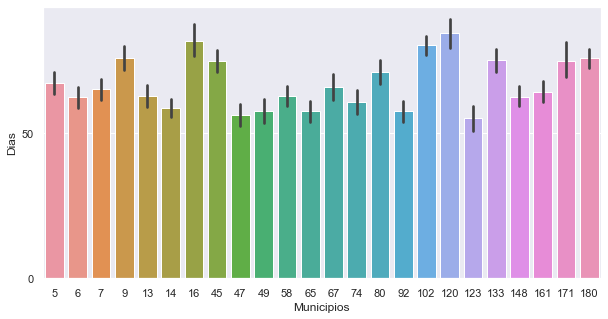

In [316]:
#saco los 10 municipios con mas ozono
dia_=ozono['media_dia'].nlargest(n=10)
dia_index=dia_.index
dia_index
for dia in dia_index:
    ozono_municipio=ozono['municipio'][dia]
    #print(ozono_municipio)
sns.set(rc = {'figure.figsize':(10,5)})
plt = sns.barplot(x = ozono['municipio'], y = ozono['media_dia'])
plt.set(xlabel = "Municipios", ylabel = "Dias")
sns.set(font_scale=10)

In [ ]:
#Grafico del dia que hubieron mas emisiones de ozono
#¿En que dia del mes se ha visto una media mas alta en las emiciones de ozono?

In [272]:
import matplotlib.pyplot as plt
import numpy as np
#muestra las emisiones mas altas en el dia por municipios
valores_max=ozono.iloc[:,5:].max()
#saco la posicion de la fila con el valor maximo
i=ozono.iloc[:,5:].idxmax()
#guardo los valores maximos en un df
df_valores_max=pd.DataFrame(data=valores_max)
municipios_max=ozono['municipio'][i]
dia_max=ozono['dia'][i]
df_municipios=pd.DataFrame(data=municipios_max)
df_dia=pd.DataFrame(data=dia_max)
#le quitamos los indices que no usaremos
a=df_valores_max.reset_index(drop=True)
b=df_municipios.reset_index(drop=True)
c=df_dia.reset_index(drop=True)
#consultamos los municipios que estamos viendo
#AQUI SE DEBE REALIZAR UNA QUERY PARA QUE ME REMPLACE LOS ID_MUNICIPIOS POR LOS NOMBRES
array_nombres=[]
# Ahora podemos recorrer todos los usuarios
for m in b['municipio']:
    cursor.execute("SELECT municipios FROM municipios where id_municipios="+str(m))
    municipios = cursor.fetchall()
    array_nombres.append(municipios)

nombres=pd.DataFrame(array_nombres)
#conexion.close()
#mezclamos las columnas
b.insert(loc=1, column="dia", value=c)
b.insert(loc=2, column="maximo_valor_dia", value=a)
#elimino la columna de id de municipio 
b.drop( columns=['municipio'], axis=1, inplace=True, errors='ignore')
b.insert(loc=2, column="municipio", value=nombres)
print('MUNICIPIOS EN LOS QUE HUBO MAS EMISION EN EL MES DE SEPTIEMBRE DEL2022')
b


MUNICIPIOS EN LOS QUE HUBO MAS EMISION EN EL MES DE SEPTIEMBRE DEL2022


,dia,maximo_valor_dia,municipio
0,1,121.0,"(PUERTO DE COTOS,)"
1,1,122.0,"(PUERTO DE COTOS,)"
2,1,116.0,"(PUERTO DE COTOS,)"
3,1,112.0,"(PUERTO DE COTOS,)"
4,1,111.0,"(PUERTO DE COTOS,)"
5,1,111.0,"(PUERTO DE COTOS,)"
6,1,109.0,"(PUERTO DE COTOS,)"
7,1,117.0,"(PUERTO DE COTOS,)"
8,1,124.0,"(PUERTO DE COTOS,)"
9,1,145.0,"(VILLA DEL PRADO,)"


In [224]:
import seaborn as sns

In [260]:
b.to_csv('emisiones_municipios.csv')

DIAS QUE HUBO MAS EMISION DE OZONO EN EL MES DE SEPTIEMBRE DEL 2022


<AxesSubplot:xlabel='dia', ylabel='maximo_valor_dia'>

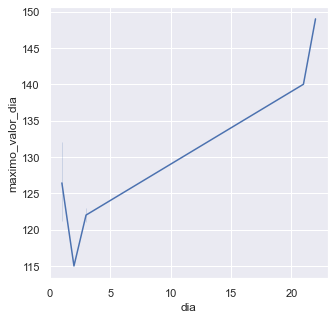

In [271]:
#dias que hubo mas emision de ozono en este mes el año 2022
print('DIAS QUE HUBO MAS EMISION DE OZONO EN EL MES DE SEPTIEMBRE DEL 2022')
sns.lineplot(data=b, x="dia", y="maximo_valor_dia")

In [ ]:
#data = b.groupby(by=["municipio"], as_index = False)

#sns.set(rc={'figure.figsize':(5,5)})
#print(mun)

#sns.lineplot(data=mun["(ALCALÁ DE HENARES,)"])
#sns.lineplot(data=b, x="dia", y="maximo_valor_dia")

In [269]:
#sns.lineplot(data=data,x=data["municipio"],y=data["maximo_valor_dia"])

country_set = set(b['maximo_valor_dia'])
print(country_set)
plt.figure()
for country in country_set:
     selected_data = b.loc[b['maximo_valor_dia'] == country]
     plt.plot(selected_data['dia'], selected_data['municipio'], label=country)
plt.legend()
plt.show()
#y
#print(ozono['municipio'][i])


In [9]:
maxValues

provincia                    28
municipio                   180
estacion                     14
magnitud                    431
punto_muestreo    28180001_9_49
ano                        2022
mes                           9
dia                          28
h01                       160.0
v01                           V
h02                       122.0
v02                           V
h03                       119.0
v03                           V
h04                       119.0
v04                           V
h05                       134.0
v05                           V
h06                       213.0
v06                           V
h07                       342.0
v07                           V
h08                       310.0
v08                           V
h09                       165.0
v09                           V
h10                       153.0
v10                           V
h11                       134.0
v11                           V
h12                       133.0
v12     